### Deep Learning Pipeline Basics: CNN model deployment and improvement on out of sample data

This is a short example of how how to deploy a trained model. Shout out to SentDex for the cool tutorial. 

### Model Pipeline
1. Format data
    a. converted images to grayscale
    b. Resize all images to normalize the dataset
    c. Inspect. After inspection of our input methodologies we realized that the cats and dogs in our data were all grouped together so we applied random shuffling to fix this.
2. Create training dataset and inspect it closely
3. Construct model
4. Fit, train, and save a number of models with different parameters into a log file
5. Evaluate saved models (using TensorBoard) to determine which model had the optimal performance (decide whether or not to go back to step 4)  
6. Load in optimal model and deploy on out of sample data

Now let's pass some images into the model and see if it can accurately classify them

For best results we could use images that we took ourselves so we know that they are  actual out of sample data


In [1]:
import cv2
import tensorflow as tf

from IPython import display
from IPython.display import (display_pretty, display_html,display_jpeg, display_png,
                            display_json, display_svg)

from IPython.display import Image

### Model Deployment
Now let's write a function that takes the file path containing the images we want to deploy the model on.

Then we'll load in the optimized model that we trained and saved earlier and deploy it on our (hopefully) out of sample images.

#### Label Key
0 = Dog  
1 = Cat

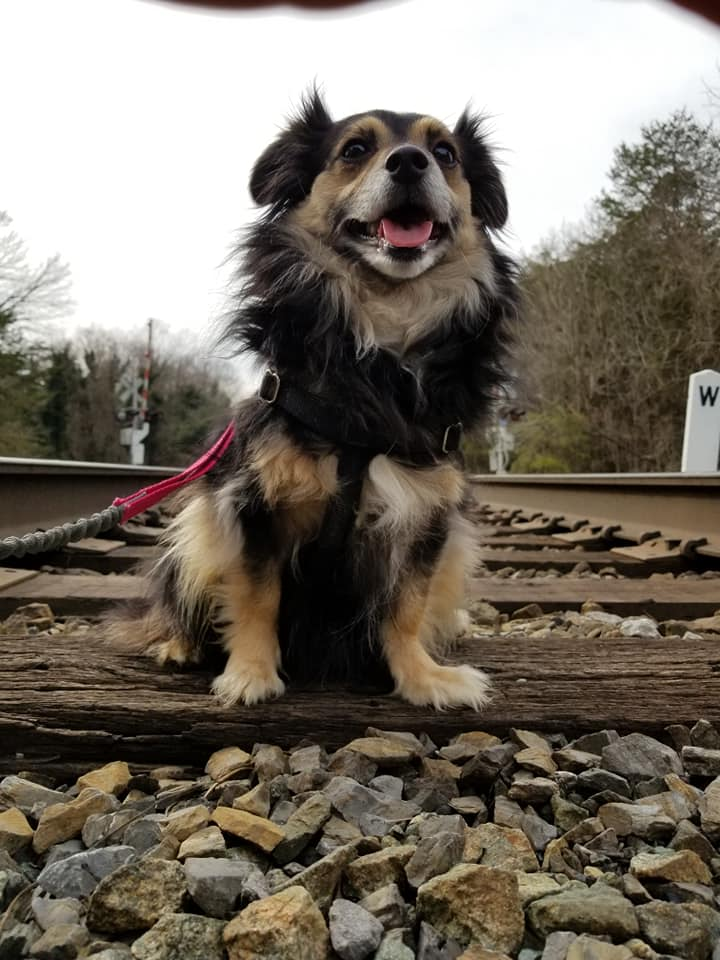

In [4]:
Image(filename="Taco.jpg",embed=True,width=500,height=500)

Meet Taco! Despite his size he is definitely not a cat. Let's see if the model can tell

In [5]:
CATEGORIES = ["Dog","Cat"]

def prepare(filepath):
    IMG_SIZE = 200
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64x3-CNN.model")

# ALWAYS pass a list into predict
prediction = model.predict([prepare('Taco.jpg')])

print(prediction)

[[0.]]


Looks like the model was correct. It labeled Taco as a dog


Here is a a cat named Wilfred aka "Wilfred the Warrior". He's quite the celeb on Instagram. Let's see if our model recognizes him as a cat.

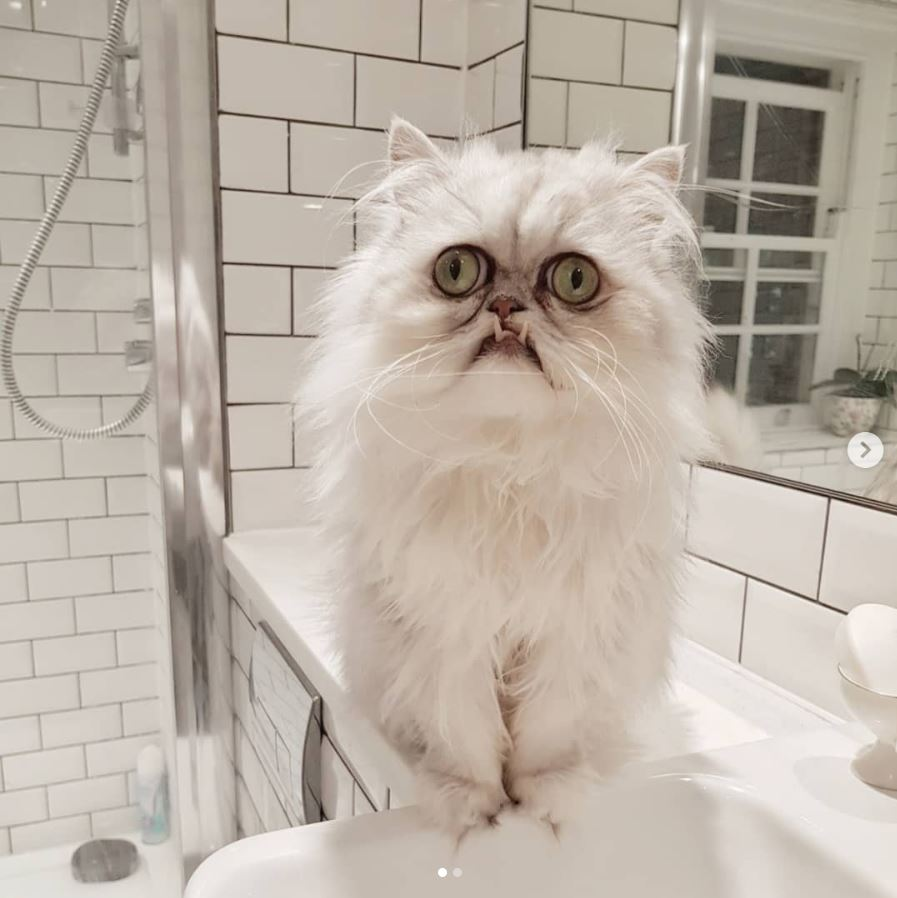

In [6]:
Image(filename="cat.jpg",embed=True,width=500,height=500)

In [7]:
prediction = model.predict([prepare('cat.jpg')])

print(prediction)

[[1.]]


Looks like the model was correct again!

And just because everybody loves cute puppies, here's one more

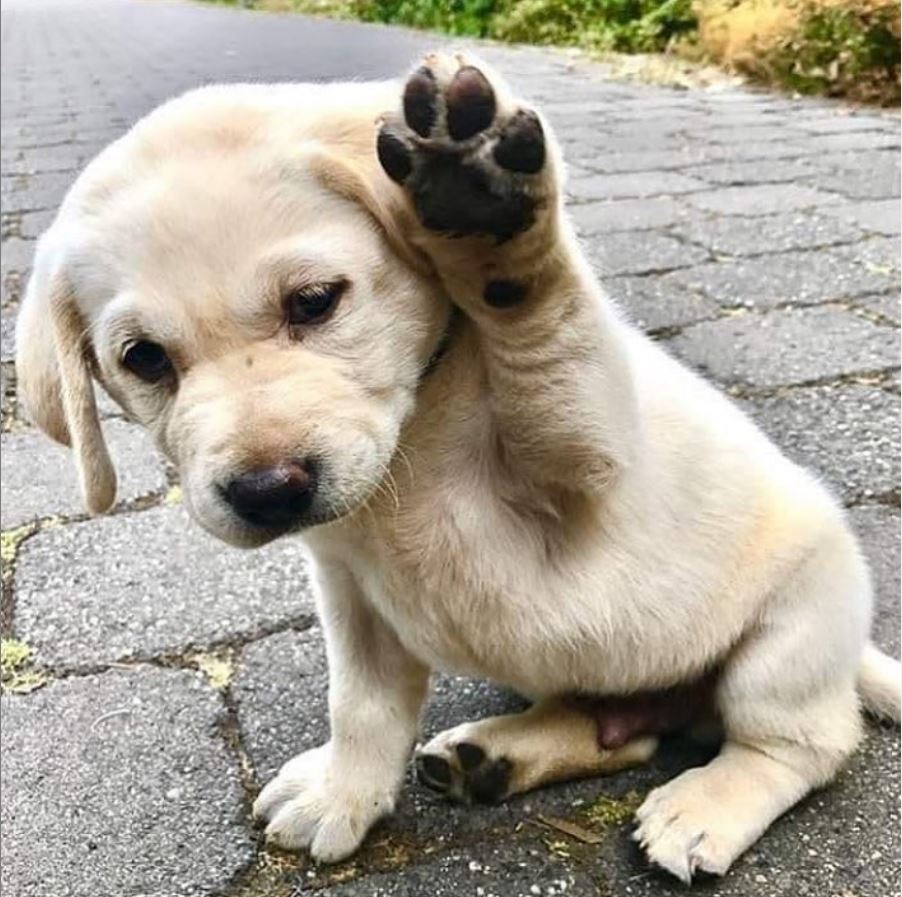

In [30]:
Image(filename="dog.jpg",embed=True,width=500,height=500)

In [31]:
prediction = model.predict([prepare('dog.jpg')])

print(prediction)

[[0.]]


Right agian, looks like the model is 3 for 3 so far. 

## Next steps for model improvement

__Inspect the data in greater detail__  
One of the most important aspects in building a robust machine learning model is having the best possible understanding of the underlying data (train, test, validation). A comprehensive understand of the data will also provide valuable insights about the explainability of the model.

Most often "in the wild" you won't have the luxury of working with a clean dataset, but having the ability to optimize and comprehensively understand the data that you have to work with will maximize your potential for successfully delivering on your end goal(s).

For example, to improve our image classification model we could start to explore different details about the images in our dataset. Answering question such as image quality, background details, distribution of various breeds of each cat and dog, distribution of ages of each animal. In a perfect world this information would be easy to obtain but all too often it isn't. One effective solution for working around this (when possible) is to leverage the knowledge of data experts if they are available. Diving deeper into data collection methodologies and leveraging experts within that part of the pipeline could also potentially lead to improvements in the modeling process.

__Ablation of the model and data__  
Removing critical parts of the model and/or dataset to better understand how each impacts performance

__Forward/Backward Selection__  
Start with one feature and iteratively add more (by one or more at a time) / Start with all features and iteratively reduce them (by one or more at a time)

__Utilization of Traditional Model Performance Metrics__
1. F1 Metric
2. Lift
3. ROC Curve
4. Precision/Recall Curve

__Effective/Creative Visualization__  
Sometimes one of the best ways to understand something better is to look at it from a different angle 

__Target Shuffling__  
Note your current model's performance. Then randomly shuffle the target variables to break the relationship between each output and its vector of inputs. Re-run your model again and search for a new best model, or "best apparent discovery" which you'll use as your "bad" comparison and save the model's strengths for each iteration of this process. Repeat these last two steps a large number of times, recording the performance until you have a large number of samples. Compare where your original model's performance stands on the performance distribution of the randomly shuffled "bad" examples.

If the "bad" model's performance distribution outperformes your model by any percent, that is the percent chance that your original model is bogus.

I greatly appreciate this concept because it is practical, effective, and easy to explain to clients. It will help you benchmark your model's performance against randomness so you can confidently understand where your model's performance ranks and if you have effectively constructed a robust model.

This concept was created by John Elder, the founder of Elder Research.